`pybdshadow` is a python package to analyze building shadow.   
The latest stable release of the software can be installed via pip and full documentation can be found [here](https://pybdshadow.readthedocs.io/en/latest/).

# Building data

`pybdshadow` is capable of generating shadows from building outline data. Building outline data can be obtain by Python package [OSMnx](https://osmnx.readthedocs.io/en/stable/) from OpenStreetMap. 
The buildings are usually store in the data as the form of Polygon object with `height` column.

In [1]:
import pandas as pd
import geopandas as gpd
import pybdshadow
#Read building data
buildings = gpd.read_file(r'data/bd_demo_2.json')
buildings

,Id,Floor,height,x,y,geometry
0,0,2,6.0,120.597313,31.309152,"POLYGON ((120.59739 31.30921, 120.59740 31.309..."
1,0,2,6.0,120.597276,31.309312,"POLYGON ((120.59737 31.30938, 120.59738 31.309..."
2,0,2,6.0,120.597313,31.308982,"POLYGON ((120.59741 31.30905, 120.59742 31.308..."
3,0,2,6.0,120.597272,31.309489,"POLYGON ((120.59735 31.30955, 120.59736 31.309..."
4,0,2,6.0,120.597128,31.309778,"POLYGON ((120.59729 31.30986, 120.59730 31.309..."
...,...,...,...,...,...,...
3071,0,1,3.0,120.614903,31.290525,"POLYGON ((120.61491 31.29059, 120.61491 31.290..."
3072,0,1,3.0,120.615279,31.290356,"POLYGON ((120.61532 31.29039, 120.61533 31.290..."
3073,0,1,3.0,120.614895,31.290959,"POLYGON ((120.61484 31.29093, 120.61484 31.291..."
3074,0,1,3.0,120.614764,31.290883,"POLYGON ((120.61472 31.29091, 120.61481 31.290..."


In [2]:
buildings['y'].mean()

31.300142838278234

Preprocess building data using `bd_preprocess` before calculate shadow. It will remove empty polygons and convert multipolygons into polygons.

In [3]:
buildings = pybdshadow.bd_preprocess(buildings)

# Shadow analysis

## Shadow generated by Sun light

Given a building GeoDataFrame and UTC datetime, `pybdshadow` can calculate the building shadow based on the sun position obtained by `suncalc`

In [4]:
#Given UTC time
date = pd.to_datetime('2022-01-01 12:45:33.959797119')\
    .tz_localize('Asia/Shanghai')\
    .tz_convert('UTC')
#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,roof=True,include_building = False)
shadows['type'] += ' shadow'

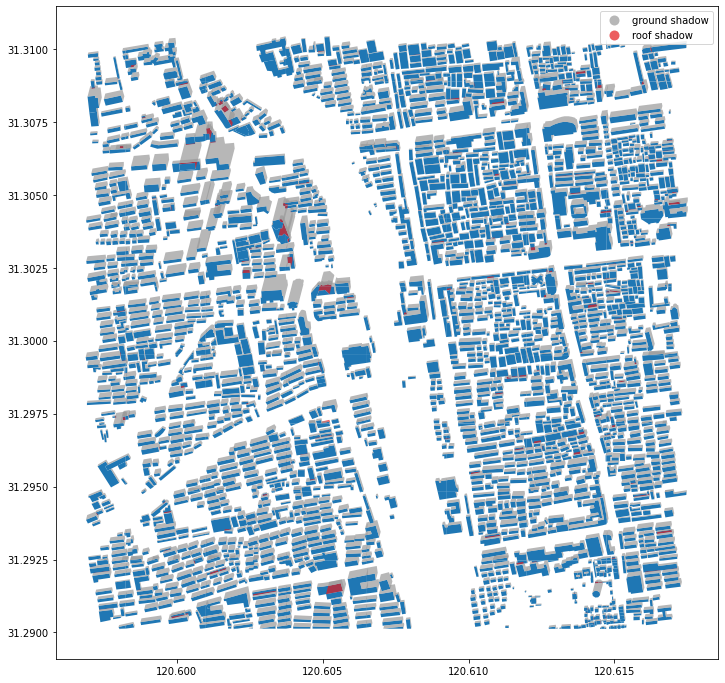

In [5]:
# Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1, (12, 12))
ax = plt.subplot(111)

# plot buildings
buildings.plot(ax=ax)

# plot shadows
shadows.plot(ax=ax, alpha=0.7,
             column='type',
             categorical=True,
             cmap='Set1_r',
             legend=True)

plt.show()


`pybdshadow` also provide visualization method supported by keplergl.

In [29]:
#Visualize using keplergl
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o3', 'type': '…

![1649161376291.png](https://github.com/ni1o1/pybdshadow/raw/main/image/README/1649161376291_1.png)

## Shadow generated by Point light

`pybdshadow` can also calculate the building shadow generated by point light. Given coordinates and height of the point light:

In [35]:
#Calculate building shadow for point light
shadows = pybdshadow.bdshadow_pointlight(buildings,120.60820619503946,31.300141884245672,100)
#Visualize buildings and shadows
pybdshadow.show_bdshadow(buildings = buildings,shadows = shadows)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': 'lz48o3', 'type': '…

![1649405838683.png](https://github.com/ni1o1/pybdshadow/raw/main/image/README/1649405838683_1.png)